# 한글 Word2Vec 만들기
- 한글로 된 코퍼스를 다운받아 전처리를 수행
- 전처리한 데이터를 바탕으로 Word2Vec 수행

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 460kB 42.0MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f616c0f8190>)

In [4]:
!ls -l

total 116900
-rw-r--r-- 1 root root 25645618 Feb 24 01:10 eng_w2v
-rw-r--r-- 1 root root 19515078 Feb 24 01:14 ratings.txt
drwxr-xr-x 1 root root     4096 Feb 22 14:38 sample_data
-rw-r--r-- 1 root root 74533638 Feb 24 00:57 ted_en-20160408.xml


### 훈련 데이터 전처리하기

In [5]:
train_df = pd.read_table('ratings.txt')
train_df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [6]:
train_df.shape

(200000, 3)

In [7]:
train_df = train_df.dropna(how = 'any')

In [8]:
train_df['document'] = train_df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [10]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

import tqdm.notebook as tn
okt = Okt()

tokenized_data = []
for sentence in tn.tqdm(train_df['document']):
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


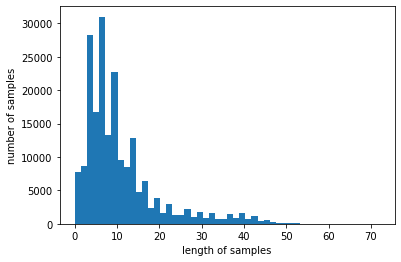

In [11]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### Word2Vec 훈련시키기
- size = 워드 벡터의 특징 값, 임베딩 된 벡터의 차원
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram

In [13]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

In [14]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [15]:
model_result = model.wv.most_similar('최민식')
model_result

[('유다인', 0.8884869813919067),
 ('한석규', 0.887120246887207),
 ('안성기', 0.8793113231658936),
 ('이민호', 0.8759400844573975),
 ('공리', 0.8712712526321411),
 ('정재영', 0.8648648858070374),
 ('최민수', 0.8606131672859192),
 ('박중훈', 0.8595395088195801),
 ('송강호', 0.8573510646820068),
 ('김명민', 0.8525432348251343)]

In [16]:
model_result = model.wv.most_similar('히어로')
model_result

[('무협', 0.8745901584625244),
 ('슬래셔', 0.8740103244781494),
 ('블록버스터', 0.8629682064056396),
 ('느와르', 0.8572574853897095),
 ('호러', 0.8500077724456787),
 ('물의', 0.8292568922042847),
 ('무비', 0.8291083574295044),
 ('물', 0.8251274228096008),
 ('홍콩', 0.8227049708366394),
 ('정통', 0.817497730255127)]